                CORONAVIRUS (COVID-19) EXPLORATORY DATA ANALYSIS AND VISUALIZATION

The Severe acute respiratory syndrome coronavirus-2 (SARS-CoV-2) is responsible for the current coronavirus disease 2019 (COVID-19) pandemic. COVID-19 has now infected more than 2 million individuals and killed 120 thousand people around the
world. The rapid transmission of SARS-CoV-2 continues and there is no drug or vaccineagainst the disease yet. While scientists are working to find the right solution, it is important to curtail the spread of this virus.
We take the initiative to go through an EDA on the diesase and provide explanations to some insights we gain from the EDA.

Lets get started 


Importing relevant python packages and libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime as dt
from datetime import timedelta
import operator
import calmap

Loading data from JHU github repository

In [2]:
# Get the latest data
!git clone https://github.com/CSSEGISandData/COVID-19


fatal: destination path 'COVID-19' already exists and is not an empty directory.


In [3]:
# Retriving Dataset
confirmed = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
deaths = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
recoveries = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')

Preprocessing of the data

We are trying to put the data in a more useable format for our analysis. ie Havu=ing all dates and vaues in single columns

In [4]:
#minor preprocesing
confirmed=confirmed.drop(['Province/State','Lat', 'Long'],axis=1).sort_values('Country/Region')
deaths=deaths.drop(['Province/State','Lat', 'Long'],axis=1).sort_values('Country/Region')
recoveries=recoveries.drop(['Province/State','Lat', 'Long'],axis=1).sort_values('Country/Region')

In [5]:
train_dates = confirmed.columns[1:] # The dates for the train period

# Grouping by territory
country_deaths = deaths.groupby('Country/Region').sum()[train_dates]
country_cases = confirmed.groupby('Country/Region').sum()[train_dates] 
country_recoveries = recoveries.groupby('Country/Region').sum()[train_dates] 

In [6]:
# Creating the dataframe
data = pd.DataFrame({
    'Country':country_cases.stack().reset_index()['Country/Region'].to_list(),
    'dates':country_cases.stack().reset_index()['level_1'],
    'cases':country_cases.stack().reset_index()[0],
    'deaths':country_deaths.stack().reset_index()[0],
    'recoveries':country_recoveries.stack().reset_index()[0]
})

# get mortality and recovery rates per day
data['Mortality_rate']=data['deaths']/data['cases']
data['Recovery_rate']=data['recoveries']/data['cases']

Working on world stats to get a good overview

In [7]:
#picking off all dates
cols = confirmed.keys()

confirmed_dates = confirmed.loc[:, cols[4]:cols[-1]]
deaths_dates = deaths.loc[:, cols[4]:cols[-1]]
recoveries_dates = recoveries.loc[:, cols[4]:cols[-1]]

dates = confirmed_dates.keys()
world_cases = []
total_deaths = [] 
mortality_rate = []
recovery_rate = [] 
total_recovered = [] 
total_active = []

china_cases = [] 
italy_cases = []
us_cases = [] 
spain_cases = [] 
france_cases = [] 
germany_cases = [] 
uk_cases = [] 
russia_cases = []
iran_cases = []
turkey_cases = []

for i in dates:
    confirmed_sum = confirmed_dates[i].sum()
    death_sum = deaths_dates[i].sum()
    recovered_sum = recoveries_dates[i].sum()
    
    # confirmed, deaths, recovered, and active
    world_cases.append(confirmed_sum)
    total_deaths.append(death_sum)
    total_recovered.append(recovered_sum)
    total_active.append(confirmed_sum-death_sum-recovered_sum)
    
    # calculate rates
    mortality_rate.append(death_sum/confirmed_sum)
    recovery_rate.append(recovered_sum/confirmed_sum)
    
    # case studies 
    china_cases.append(confirmed[confirmed['Country/Region']=='China'][i].sum())
    italy_cases.append(confirmed[confirmed['Country/Region']=='Italy'][i].sum())
    us_cases.append(confirmed[confirmed['Country/Region']=='US'][i].sum())
    spain_cases.append(confirmed[confirmed['Country/Region']=='Spain'][i].sum())
    france_cases.append(confirmed[confirmed['Country/Region']=='France'][i].sum())
    germany_cases.append(confirmed[confirmed['Country/Region']=='Germany'][i].sum())
    uk_cases.append(confirmed[confirmed['Country/Region']=='United Kingdom'][i].sum())
    russia_cases.append(confirmed[confirmed['Country/Region']=='Russia'][i].sum())
    iran_cases.append(confirmed[confirmed['Country/Region']=='Iran'][i].sum())
    turkey_cases.append(confirmed[confirmed['Country/Region']=='Turkey'][i].sum())


def daily_increase(data):
    d = [] 
    for i in range(len(data)):
        if i == 0:
            d.append(data[0])
        else:
            d.append(data[i]-data[i-1])
    return d 

# daily increases
world_daily_increase = daily_increase(world_cases)
death_daily_increase = daily_increase(total_deaths)
recovery_daily_increase = daily_increase(total_recovered)
active_daily_increase = daily_increase(total_active)


Working on dates

In [8]:
days_since_1_22 = np.array([i for i in range(len(dates))]).reshape(-1, 1)
world_cases = np.array(world_cases).reshape(-1, 1)
total_deaths = np.array(total_deaths).reshape(-1, 1)
total_recovered = np.array(total_recovered).reshape(-1, 1)

days_in_future = 10
future_forcast = np.array([i for i in range(len(dates)+days_in_future)]).reshape(-1, 1)
adjusted_dates = future_forcast[:-10]

World over view on cases,deaths,recoveries

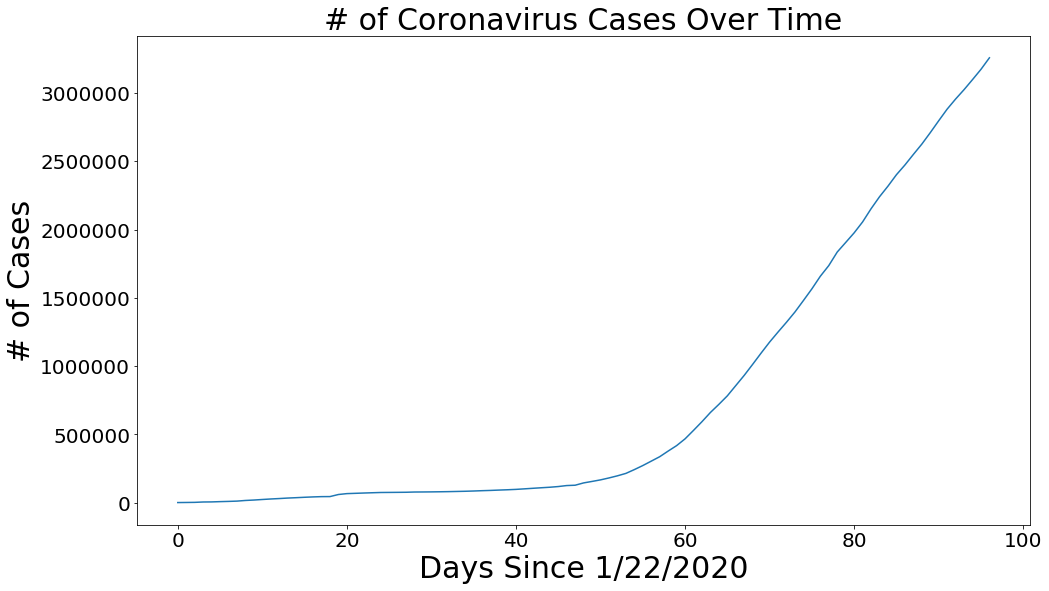

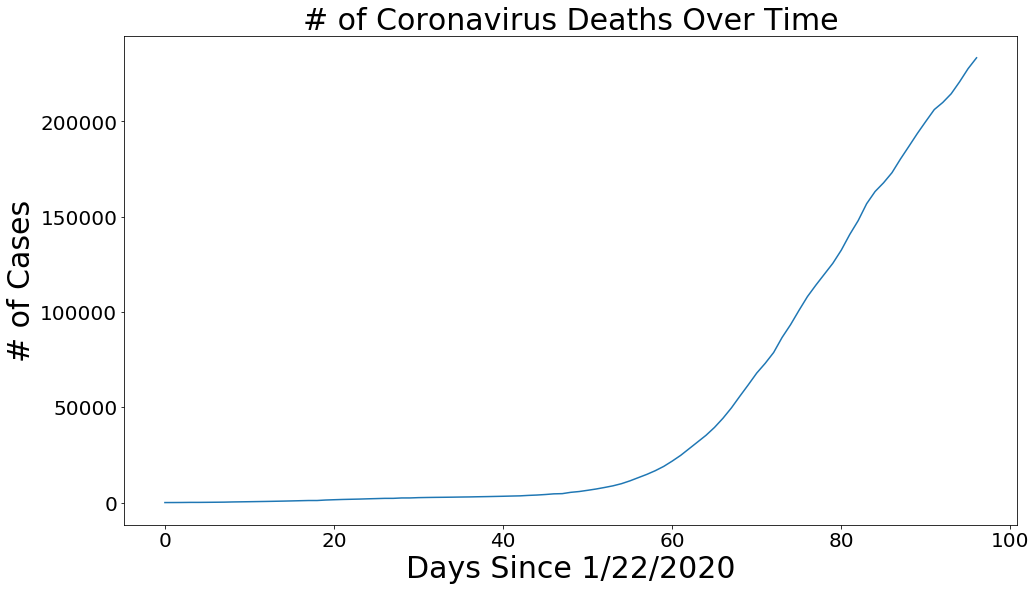

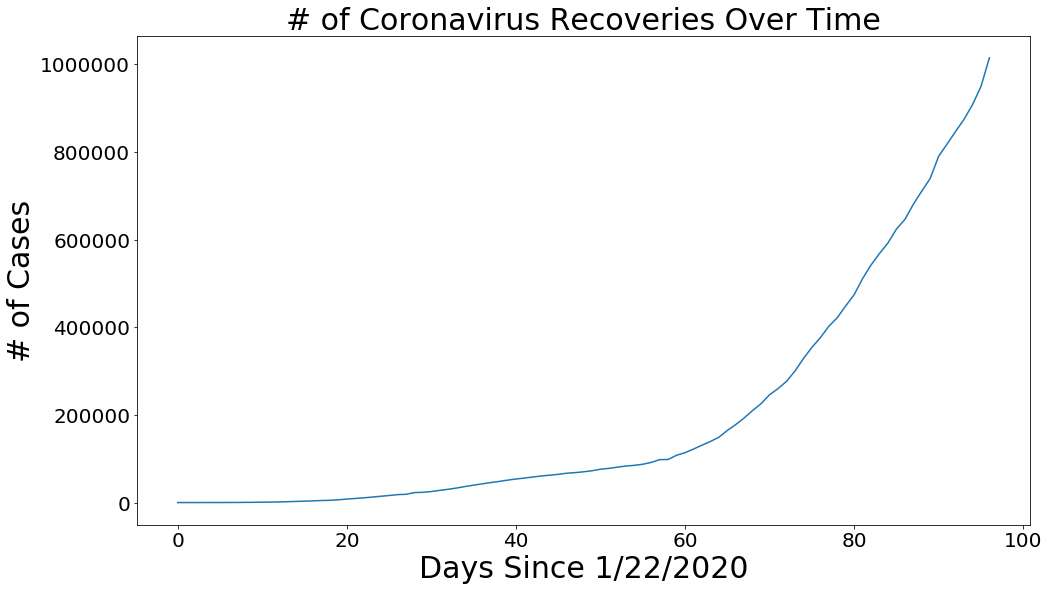

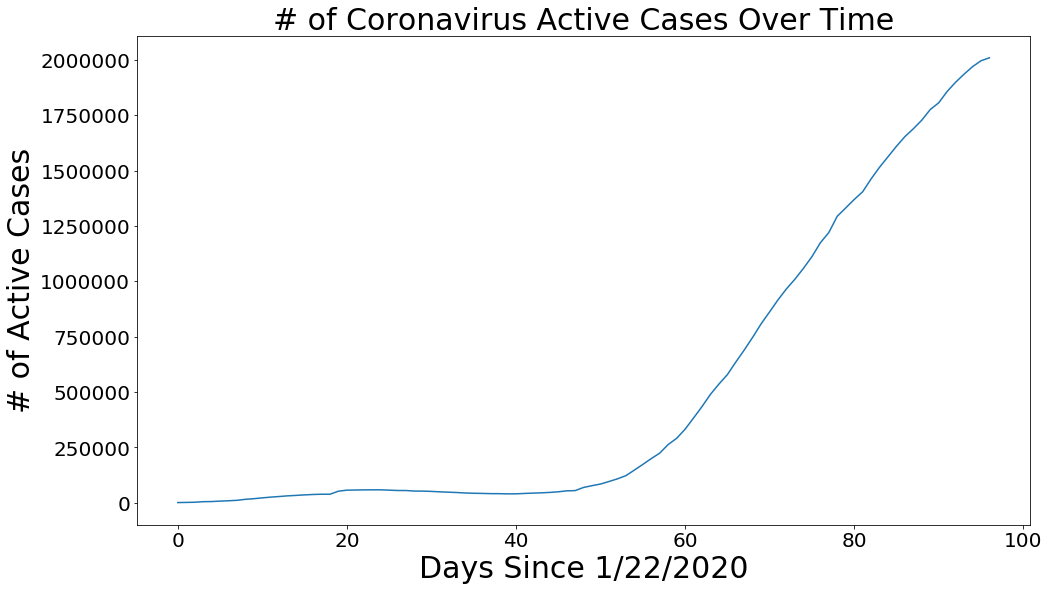

In [9]:
adjusted_dates = adjusted_dates.reshape(1, -1)[0]
plt.figure(figsize=(16, 9))
plt.plot(adjusted_dates, world_cases)
plt.title('# of Coronavirus Cases Over Time', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('# of Cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

plt.figure(figsize=(16, 9))
plt.plot(adjusted_dates, total_deaths)
plt.title('# of Coronavirus Deaths Over Time', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('# of Cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

plt.figure(figsize=(16, 9))
plt.plot(adjusted_dates, total_recovered)
plt.title('# of Coronavirus Recoveries Over Time', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('# of Cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

plt.figure(figsize=(16, 9))
plt.plot(adjusted_dates, total_active)
plt.title('# of Coronavirus Active Cases Over Time', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('# of Active Cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

Mortality Rate (worldwide)

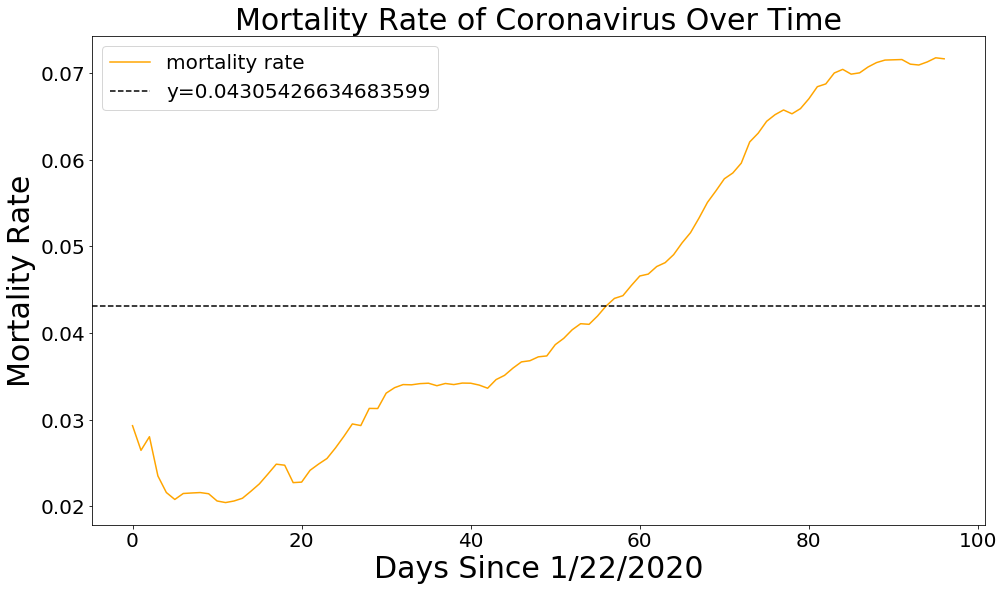

In [10]:
mean_mortality_rate = np.mean(mortality_rate)
plt.figure(figsize=(16, 9))
plt.plot(adjusted_dates, mortality_rate, color='orange')
plt.axhline(y = mean_mortality_rate,linestyle='--', color='black')
plt.title('Mortality Rate of Coronavirus Over Time', size=30)
plt.legend(['mortality rate', 'y='+str(mean_mortality_rate)], prop={'size': 20})
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('Mortality Rate', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

Recovery Rate (worldwide)

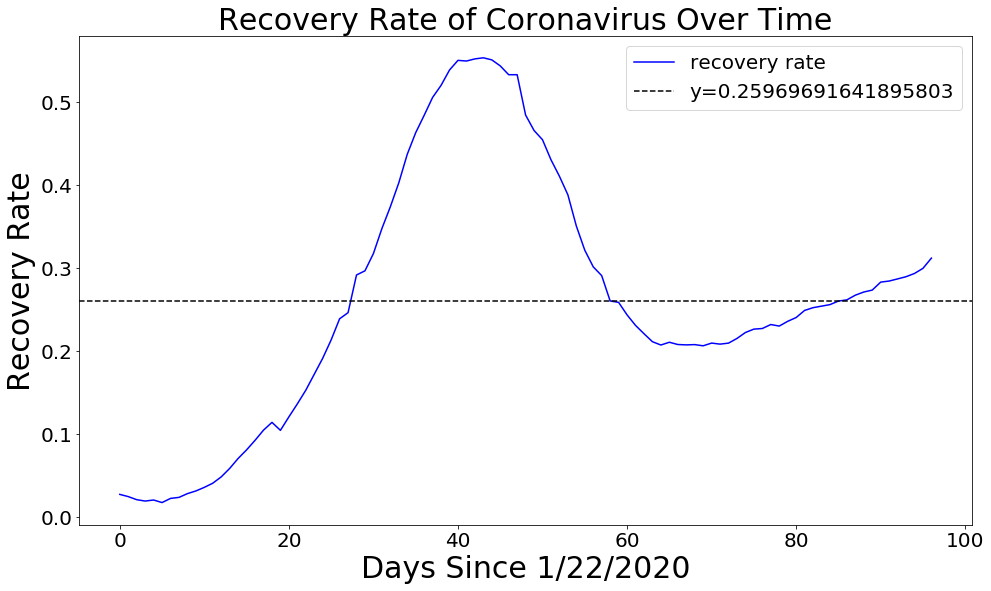

In [11]:
mean_recovery_rate = np.mean(recovery_rate)
plt.figure(figsize=(16, 9))
plt.plot(adjusted_dates, recovery_rate, color='blue')
plt.axhline(y = mean_recovery_rate,linestyle='--', color='black')
plt.title('Recovery Rate of Coronavirus Over Time', size=30)
plt.legend(['recovery rate', 'y='+str(mean_recovery_rate)], prop={'size': 20})
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('Recovery Rate', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

Graphing deaths against recoveries

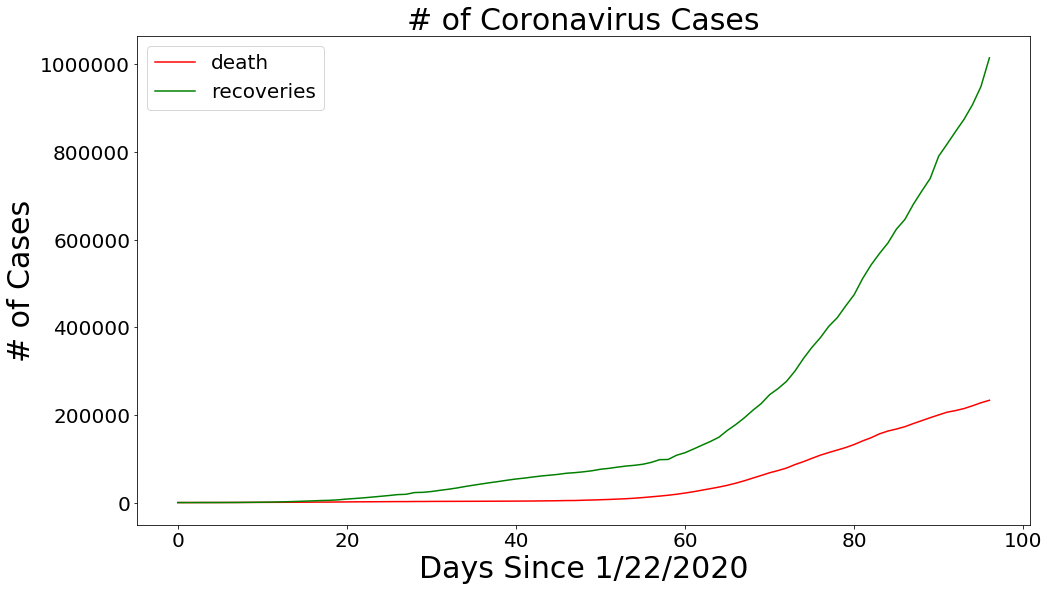

In [12]:
plt.figure(figsize=(16, 9))
plt.plot(adjusted_dates, total_deaths, color='r')
plt.plot(adjusted_dates, total_recovered, color='green')
plt.legend(['death', 'recoveries'], loc='best', fontsize=20)
plt.title('# of Coronavirus Cases', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('# of Cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

Working on a per country view

In [13]:
unique_countries =  list(data['Country'].unique())

country_confirmed_cases = []
country_death_cases = [] 
country_active_cases = []
country_recovery_cases = []
country_mortality_rate = [] 
country_recovery_rate = []

no_cases = []
for i in unique_countries:
    cases = data[data['Country']==i]['cases'].sum()
    if cases > 0:
        country_confirmed_cases.append(cases)
    else:
        no_cases.append(i)
        
for i in no_cases:
    unique_countries.remove(i)
    
# sort countries by the number of confirmed cases
unique_countries = [k for k, v in sorted(zip(unique_countries, country_confirmed_cases), key=operator.itemgetter(1), reverse=True)]
for i in range(len(unique_countries)):
    country_confirmed_cases[i] = data[data['Country']==unique_countries[i]]['cases'].iloc[-1]
    country_death_cases.append(data[data['Country']==unique_countries[i]]['deaths'].iloc[-1])
    country_recovery_cases.append(data[data['Country']==unique_countries[i]]['recoveries'].iloc[-1])
    country_active_cases.append(country_confirmed_cases[i] - country_death_cases[i] - country_recovery_cases[i])
    country_mortality_rate.append(country_death_cases[i]/country_confirmed_cases[i])
    country_recovery_rate.append(country_recovery_cases[i]/country_confirmed_cases[i])

In [14]:
country_df = pd.DataFrame({'Country Name': unique_countries, 'Number of Confirmed Cases': country_confirmed_cases,
                          'Number of Deaths': country_death_cases, 'Number of Recoveries' : country_recovery_cases, 
                          'Number of Active Cases' : country_active_cases,'Recovery Rate':country_recovery_rate,
                          'Mortality Rate': country_mortality_rate})

# number of cases per country/region
country_df.style.background_gradient(cmap='Greens')

,Country Name,Number of Confirmed Cases,Number of Deaths,Number of Recoveries,Number of Active Cases,Recovery Rate,Mortality Rate
0,US,1069424,62996,153947,852481,0.143953,0.058906
1,China,83956,4637,78523,796,0.935288,0.055231
2,Italy,205463,27967,75945,101551,0.369629,0.136117
3,Spain,213435,24543,112050,76842,0.524984,0.114991
4,Germany,163009,6623,123500,32886,0.757627,0.040630
5,France,167299,24410,50380,92509,0.301137,0.145906
6,United Kingdom,172481,26842,859,144780,0.004980,0.155623
7,Iran,94640,6028,75103,13509,0.793565,0.063694
8,Turkey,120204,3174,48886,68144,0.406692,0.026405
9,Russia,106498,1073,11619,93806,0.109101,0.010075


#We divie into the Analysis to try and answer three questions


 Question 1.
What caused the drop in recoveries world over from the start of March taking into account that the deaths kept rising

It is important to note that by End of Febraury and early March China was reaching the top of their curve and it was just starting to flatten. And it is without a doubt that China was/is responsible for majority of the recoveries in the world. The drop then meant that a new surge in cases was stemming up majorly from Europe and America and these caused the deep as shown below.
It is important to see that the recovery rate is slowly picking up as countries record more recoveries

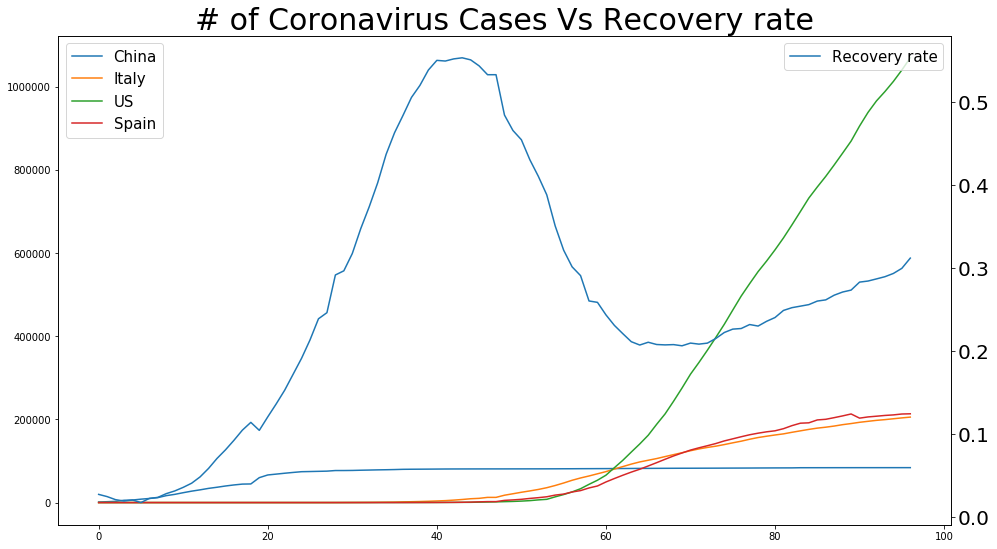

In [24]:
fig, ax1 = plt.subplots(figsize=(16, 9))
#plt.figure(figsize=(16, 9))
ax1.plot(adjusted_dates, china_cases)
ax1.plot(adjusted_dates, italy_cases)
ax1.plot(adjusted_dates, us_cases)
ax1.plot(adjusted_dates, spain_cases)
ax2 = ax1.twinx()
ax2.plot(adjusted_dates, recovery_rate)
plt.title('# of Coronavirus Cases Vs Recovery rate', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
ax1.legend(['China', 'Italy', 'US', 'Spain'], prop={'size': 15})
ax2.legend(['Recovery rate'], prop={'size': 15})
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

Question 2
Why are we noticing a higher mortality and growth rate for covid-19 amoung some regions compared to others
When we look at mortality rates by country We are noticing a slower mortlity in Africa, Australia among others. What is causing this could be the regions had a head start in preparation for the pandemic or the Airplane traffic to these places is low and thus benefited from not importing the cases or the curve is yet to spike in those geographies. We provide some visualizations to try and understand the scenarios


Question 3. On average how long do we expect the growth in covid cases to flatten out. Keeping all other factors constant.
We set out to look at the top 5 high risk countries during the corona pandemic

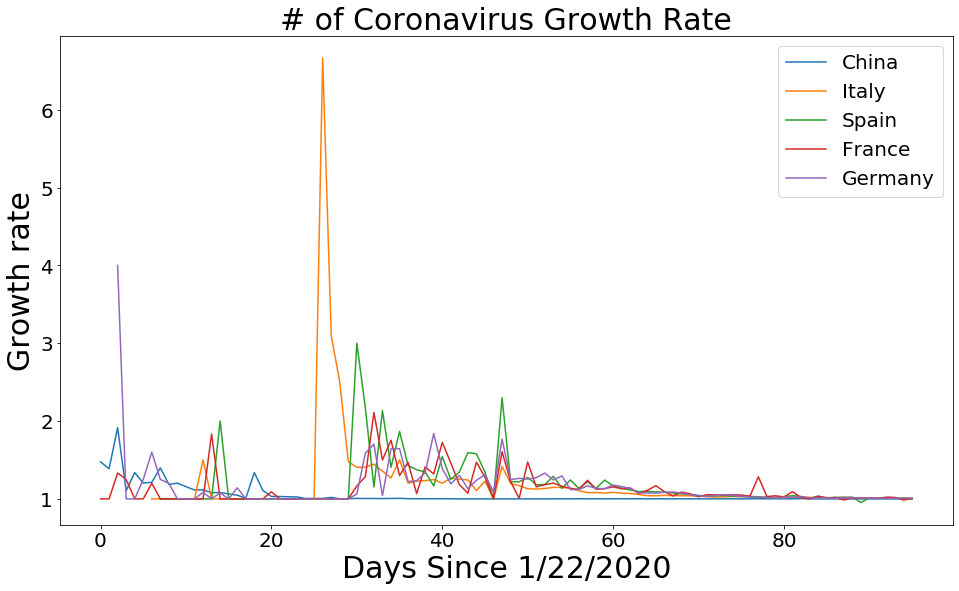

In [53]:
#Create  growth rate data for top countries
china_gr=[]
italy_gr = []
us_gr = [] 
spain_gr = [] 
france_gr = [] 
germany_gr=[]
for i in range(len(china_cases)-1):
    china_gr.append(((china_cases[i+1])/china_cases[i]))
    italy_gr.append(((italy_cases[i+1])/italy_cases[i]))
    spain_gr.append(((spain_cases[i+1])/spain_cases[i]))
    france_gr.append(((france_cases[i+1])/france_cases[i]))
    germany_gr.append(((germany_cases[i+1])/germany_cases[i]))


plt.figure(figsize=(16, 9))
plt.plot(adjusted_dates[:-1], china_gr)
plt.plot(adjusted_dates[:-1], italy_gr)
plt.plot(adjusted_dates[:-1], spain_gr)
plt.plot(adjusted_dates[:-1], france_gr)
plt.plot(adjusted_dates[:-1], germany_gr)
plt.legend(['China', 'Italy','Spain','France','Germany'], loc='best', fontsize=20)
plt.title('# of Coronavirus Growth Rate', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('Growth rate', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

On average from the plot above we realise that the first two months after recording the first case are the hardest and as we go into over 80 days the growth rate of the disease is reduced significantly. We however are yet to get to a point when the growth rate is zero.

References
https://www.kaggle.com/therealcyberlord/coronavirus-covid-19-visualization-prediction
